In [242]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_bfgs

In [243]:
matrix = np.loadtxt("ex2data1.txt", delimiter=",")
X = matrix[:, :-1]
y = matrix[:, -1]

## Visualize the data

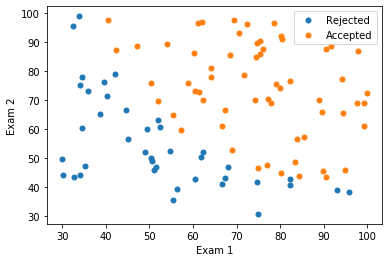

In [244]:
ex1 = X[:,0]
ex2 = X[:,1]

# set labels within a dataframe
df = pd.DataFrame(dict(x=ex1, y=ex2, label=y))
groups = df.groupby('label')

# plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)

# set plot characterisitcs
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
leg = ax.legend(loc="upper right")

# set new legend labels
leg.get_texts()[0].set_text("Rejected") 
leg.get_texts()[1].set_text("Accepted")

plt.show()

## Logistic Regression Implementation

In [245]:
init_theta = np.zeros(X.shape[1] + 1)

x_ones = np.ones(len(X)) # create ones column for x
X = np.column_stack((x_ones, X)) # merge

In [246]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    
    return g  

For an unclear reason, the advanced optimization function fmin_bfgs encounters log(0) during an iteration. This results in an error.

To avoid this error, we will add an extremely small value to what is being passed in the log() in the cost function.

<b>Cost Function</b> = 1/m * sum([-y*log(h) - (1-y)*log(1-h)])

In [247]:
def cost_func_logReg(theta, X, y):
    epsilon = 1e-5 # prevents log(0)
    m = len(X)
    J = 0

    h = sigmoid(X.dot(theta.transpose())) # mx3 * 3x1 = mx1
    mid = -(y).dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1-h + epsilon)) 
    J = 1/m * mid
    
    return J


def get_gradient(theta, X, y):
    grad = np.zeros(init_theta.size)
    
    h = sigmoid(X.dot(theta.transpose()))
    errors = h - y 
    
    grad = (1/m) * (X.transpose().dot(errors))
    
    return grad

In [248]:
J = cost_func_logReg(init_theta, X, y)
print(J) # cost should equal 0.693 

0.6931271807599427


In [249]:
# optimization function
# pass (cost function, initial theta, gradient function (optional), (X,y), max iterations)
theta = fmin_bfgs(cost_func_logReg, init_theta, fprime=get_gradient, args=(X,y), maxiter=400)

Optimization terminated successfully.
         Current function value: 0.203483
         Iterations: 20
         Function evaluations: 135
         Gradient evaluations: 27


In [250]:
# should return 0.203 with optimized theta
cost_func_logReg(theta, X, y)

0.20348330280387006

## Predict Score

In [215]:
test = [1, 45, 85]
X = np.vstack([test, X])
X
prediction = sigmoid(X[0,:].dot(theta.transpose()))
print(prediction) # should see a 0.776 probability

0.7762906975001563
